In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
alto, ancho = 200, 200
lote = 25

datosEntrenamiento = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/frutas/entrenamiento",
    image_size = (alto, ancho),
    batch_size = lote
)
datosValidacion = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/frutas/validacion",
    image_size = (alto, ancho),
    batch_size = lote
)
datosPrueba = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/frutas/prueba",
    image_size = (alto, ancho),
    batch_size = lote
)

nombreClases = datosEntrenamiento.class_names


Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(60, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(60, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(60, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3)
])


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

history = model.fit(
    datosEntrenamiento,
    validation_data = datosValidacion,
    epochs = 30
)

Epoch 1/30
19/19 [==============================] - 5s 130ms/step - loss: 1.5733 - accuracy: 0.4391 - val_loss: 0.9207 - val_accuracy: 0.6818
Epoch 2/30
19/19 [==============================] - 5s 200ms/step - loss: 0.6008 - accuracy: 0.7348 - val_loss: 0.4343 - val_accuracy: 0.8939
Epoch 3/30
19/19 [==============================] - 4s 130ms/step - loss: 0.3269 - accuracy: 0.8717 - val_loss: 0.2117 - val_accuracy: 0.9545
Epoch 4/30
19/19 [==============================] - 3s 130ms/step - loss: 0.1833 - accuracy: 0.9326 - val_loss: 0.2815 - val_accuracy: 0.8939
Epoch 5/30
19/19 [==============================] - 3s 127ms/step - loss: 0.1027 - accuracy: 0.9609 - val_loss: 0.2072 - val_accuracy: 0.9394
Epoch 6/30
19/19 [==============================] - 5s 167ms/step - loss: 0.1655 - accuracy: 0.9457 - val_loss: 0.0890 - val_accuracy: 1.0000
Epoch 7/30
19/19 [==============================] - 3s 125ms/step - loss: 0.1147 - accuracy: 0.9652 - val_loss: 0.0670 - val_accuracy: 0.9848
Epoch 

In [ ]:
model.evaluate(datosPrueba)

6/6 [==============================] - 1s 15ms/step - loss: 0.1925 - accuracy: 0.9615


[0.19248783588409424, 0.9615384340286255]

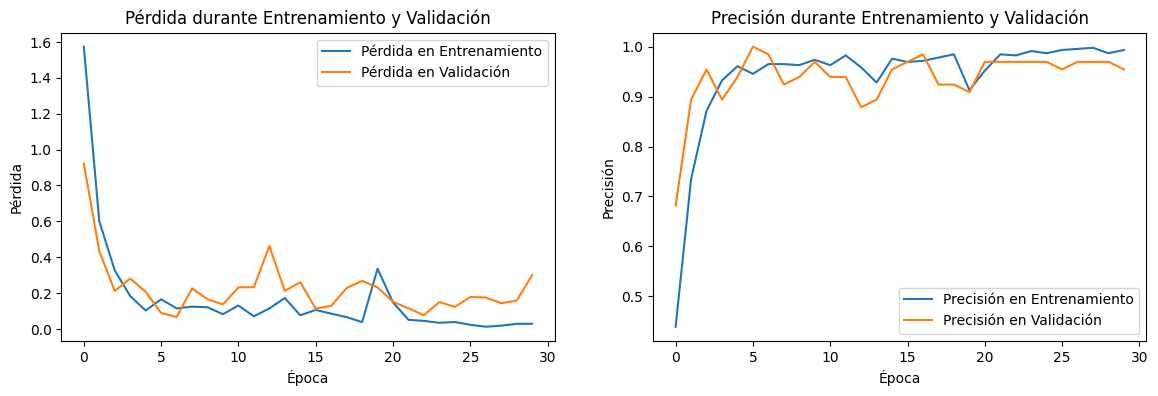

In [ ]:
#Graficando la pérdida en el entrenamiento y la validación
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.title('Pérdida durante Entrenamiento y Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

#Graficando la precisión en el entrenamiento y la validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.title('Precisión durante Entrenamiento y Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.show()


1/1 [==============================] - 0s 97ms/step


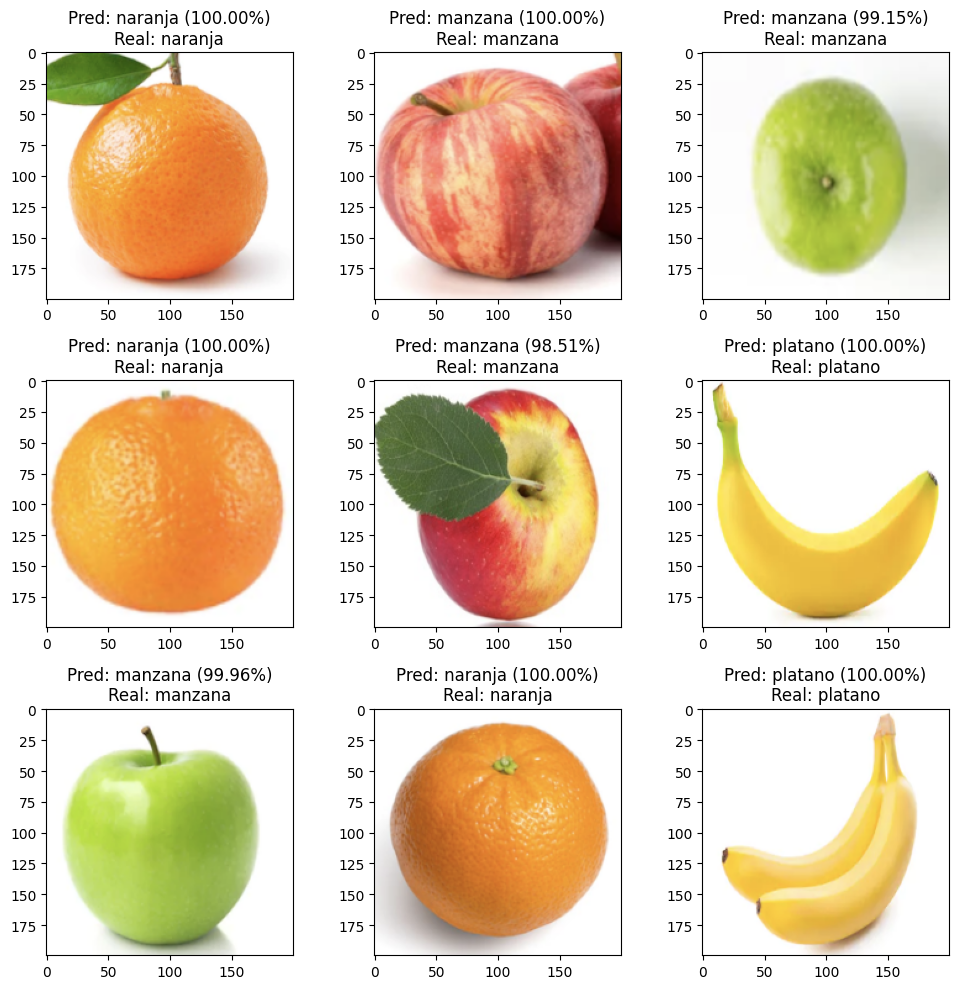

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Obtener un lote de datos de prueba
for imagenes, etiquetas in datosPrueba.take(1):
    clasificaciones = model.predict(imagenes)
    clasificaciones_prob = tf.nn.softmax(clasificaciones)

    plt.figure(figsize=(10,10))

    #Bucle a través de las primeras 9 imágenes en el lote
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(imagenes[i].numpy().astype("uint8"))
        indice = np.argmax(clasificaciones_prob[i])
        #La probabilidad de la clase predicha
        probabilidad = clasificaciones_prob[i][indice] * 100
        etiqueta_verdadera = etiquetas[i]
        plt.title(f"Pred: {nombreClases[indice]} ({probabilidad:.2f}%)\nReal: {nombreClases[etiqueta_verdadera]}")

    plt.tight_layout()
    plt.show()


In [ ]:
convertir = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = convertir.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)